<a href="https://colab.research.google.com/github/JAVerduzco/Mexico-s-energy-analysis-2020/blob/main/Cap2_Nodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y filtrado de información relacionada a los Nodos del SEN con ayuda de Pandas.

# 1. Pandas: Lectura de datos e inspección básica.

In [12]:
import pandas as pd
import os

#os.listdir()
#os.getcwd()
nodos_url = 'https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/main/Nodos.xlsx'
#nodos = pd.read_excel('Nodos.xlsx')
nodos = pd.read_excel(nodos_url, index_col = 'CLAVE')
nodos.head()

,SISTEMA,CENTRO DE CONTROL REGIONAL,ZONA DE CARGA,NOMBRE,NIVEL DE TENSIÓN (kV),CARGA DIRECTAMENTE MODELADA,CARGA INDIRECTAMENTE MODELADA,GENERACIÓN DIRECTAMENTE MODELADA,GENERACIÓN INDIRECTAMENTE MODELADA,ZONA DE OPERACIÓN DE TRANSMISIÓN,GERENCIA REGIONAL DE TRANSMISIÓN,ZONA DE DISTRIBUCIÓN,GERENCIA DIVISIONAL DE DISTRIBUCIÓN,CLAVE DE ENTIDAD FEDERATIVA (INEGI),ENTIDAD FEDERATIVA (INEGI),CLAVE DE MUNICIPIO (INEGI),MUNICIPIO (INEGI),REGION DE TRANSMISION
CLAVE,,,,,,,,,,,,,,,,,,
07ACU-115,BCA,BAJA CALIFORNIA,ENSENADA,Acueducto La Mision,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07AUE-115,BCA,BAJA CALIFORNIA,ENSENADA,Aguas Ensenada,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07CIP-115,BCA,BAJA CALIFORNIA,ENSENADA,Cipres,115.0,Directamente Modelada,Indirectamente Modelada,Directamente Modelada,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07CME-115,BCA,BAJA CALIFORNIA,ENSENADA,Cemex,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07COE-115,BCA,BAJA CALIFORNIA,ENSENADA,Colonet,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA


In [16]:
nodos.loc['07ACU-115']

SISTEMA                                                    BCA
CENTRO DE CONTROL REGIONAL                     BAJA CALIFORNIA
ZONA DE CARGA                                         ENSENADA
NOMBRE                                     Acueducto La Mision
NIVEL DE TENSIÓN (kV)                                      115
CARGA DIRECTAMENTE MODELADA                          No Aplica
CARGA INDIRECTAMENTE MODELADA          Indirectamente Modelada
GENERACIÓN DIRECTAMENTE MODELADA                     No Aplica
GENERACIÓN INDIRECTAMENTE MODELADA                   No Aplica
ZONA DE OPERACIÓN DE TRANSMISIÓN                         COSTA
GERENCIA REGIONAL DE TRANSMISIÓN               BAJA CALIFORNIA
ZONA DE DISTRIBUCIÓN                                  ENSENADA
GERENCIA DIVISIONAL DE DISTRIBUCIÓN            BAJA CALIFORNIA
CLAVE DE ENTIDAD FEDERATIVA (INEGI)                          2
ENTIDAD FEDERATIVA (INEGI)                     BAJA CALIFORNIA
CLAVE DE MUNICIPIO (INEGI)                             

In [ ]:
nodos.iloc[1]

In [ ]:
nodos.loc['07ACU-115',['NOMBRE','REGION DE TRANSMISION']]

NOMBRE                   Acueducto La Mision
REGION DE TRANSMISION               ENSENADA
Name: 07ACU-115, dtype: object

In [17]:
nodos.iloc[1:5,:]

,SISTEMA,CENTRO DE CONTROL REGIONAL,ZONA DE CARGA,NOMBRE,NIVEL DE TENSIÓN (kV),CARGA DIRECTAMENTE MODELADA,CARGA INDIRECTAMENTE MODELADA,GENERACIÓN DIRECTAMENTE MODELADA,GENERACIÓN INDIRECTAMENTE MODELADA,ZONA DE OPERACIÓN DE TRANSMISIÓN,GERENCIA REGIONAL DE TRANSMISIÓN,ZONA DE DISTRIBUCIÓN,GERENCIA DIVISIONAL DE DISTRIBUCIÓN,CLAVE DE ENTIDAD FEDERATIVA (INEGI),ENTIDAD FEDERATIVA (INEGI),CLAVE DE MUNICIPIO (INEGI),MUNICIPIO (INEGI),REGION DE TRANSMISION
CLAVE,,,,,,,,,,,,,,,,,,
07AUE-115,BCA,BAJA CALIFORNIA,ENSENADA,Aguas Ensenada,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07CIP-115,BCA,BAJA CALIFORNIA,ENSENADA,Cipres,115.0,Directamente Modelada,Indirectamente Modelada,Directamente Modelada,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07CME-115,BCA,BAJA CALIFORNIA,ENSENADA,Cemex,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA
07COE-115,BCA,BAJA CALIFORNIA,ENSENADA,Colonet,115.0,No Aplica,Indirectamente Modelada,No Aplica,No Aplica,COSTA,BAJA CALIFORNIA,ENSENADA,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,ENSENADA,ENSENADA


Podemos hacer filtrado por zona de carga o cualquier columna. En este caso queremos ver nodos de zona Hermosillo.

In [ ]:
nodos[nodos['ZONA DE CARGA']=='HERMOSILLO']

In [ ]:
nodos[(nodos['ZONA DE CARGA']=='MONTERREY') & (nodos['NIVEL DE TENSIÓN (kV)']>=230)]

Funciones con pandas

¿Cuantos nodos hay en cada zona de carga?

In [32]:
nodos_por_zona = nodos['ZONA DE CARGA'].value_counts()

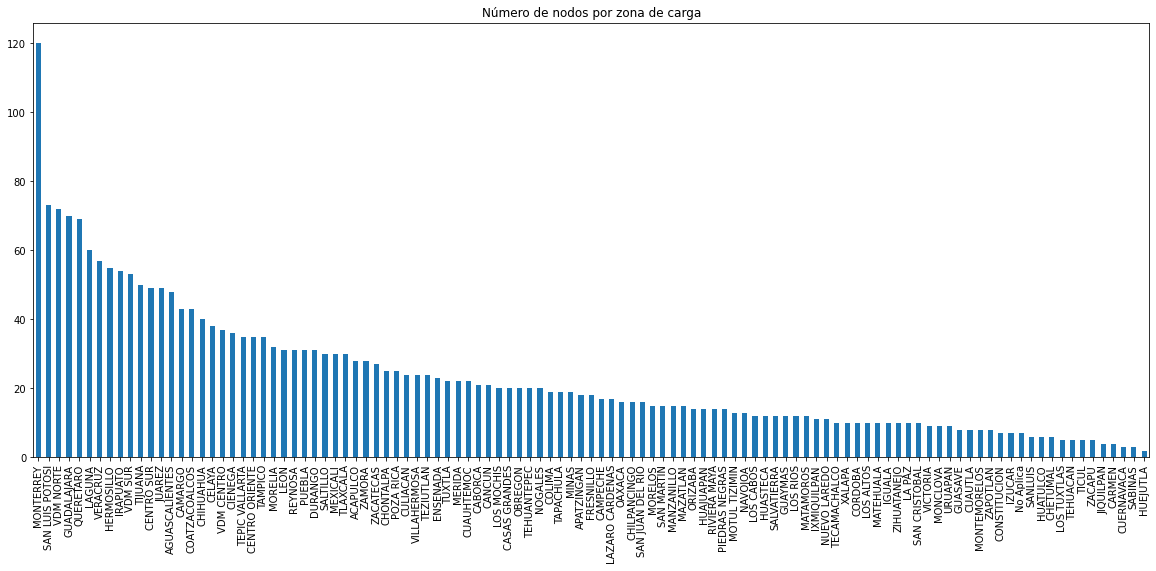

In [41]:
import matplotlib.pyplot as plt
nodos_por_zona.plot(kind='bar',rot=90,figsize = [20,8],title='Número de nodos por zona de carga')
plt.show()


Por zona de carga, cuantas subestaciones hay de cada nivel de voltaje.


In [48]:
nodos_voltaje = nodos.groupby(['ZONA DE CARGA','NIVEL DE TENSIÓN (kV)'])['NIVEL DE TENSIÓN (kV)'].count()
nodos_voltaje

ZONA DE CARGA   NIVEL DE TENSIÓN (kV)
ACAPULCO        69.0                      1
                115.0                    27
AGUASCALIENTES  115.0                    40
                230.0                     6
                400.0                     2
                                         ..
ZACATECAS       230.0                     1
                400.0                     3
ZAMORA          115.0                    28
ZAPOTLAN        115.0                     8
ZIHUATANEJO     115.0                    10
Name: NIVEL DE TENSIÓN (kV), Length: 213, dtype: int64